                                        INTERN NAME: ASHUTOSH MAURYA
    TASK2 : Prediction using Unsupervised ML
    INTERNSHIP NAME : DATA SCIENCE AND BUSINESS ANALYTICS
    INTERNSHIP PROVIDER : The Sparks Foundation
    PROGRAM : Graduate Rotational Internship Program


Importing Libraries

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly as plt
import os
from sklearn import datasets
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

Importing the Dataset From the CSV file

In [35]:
df= pd.read_csv('iris.csv')

In [36]:
## First five rows dataset showing::
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
## Dataset Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [38]:
## Size of The data
df.shape

(150, 6)

In [39]:
## Unnecessary Data Drop or Delete
df.drop('Id',axis=1,inplace=True)

In [40]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [41]:
df.shape

(150, 5)

In [42]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
## Check the duplicate value
df.duplicated().sum()

3

In [44]:
## Check the Missing value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [45]:
## Duplicate Values Remove the Dataset
df_copy=df.drop_duplicates(subset=None,inplace=False,ignore_index=False,keep='first')
df_copy.shape

(147, 5)

#### DATA VISIULIZATION

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

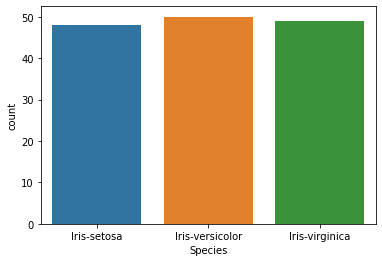

In [46]:
target = df_copy['Species']
# Count the number of data points for each flower type
print(target.value_counts())
# Visualize the target variable
sns.countplot(x='Species', data=df_copy)

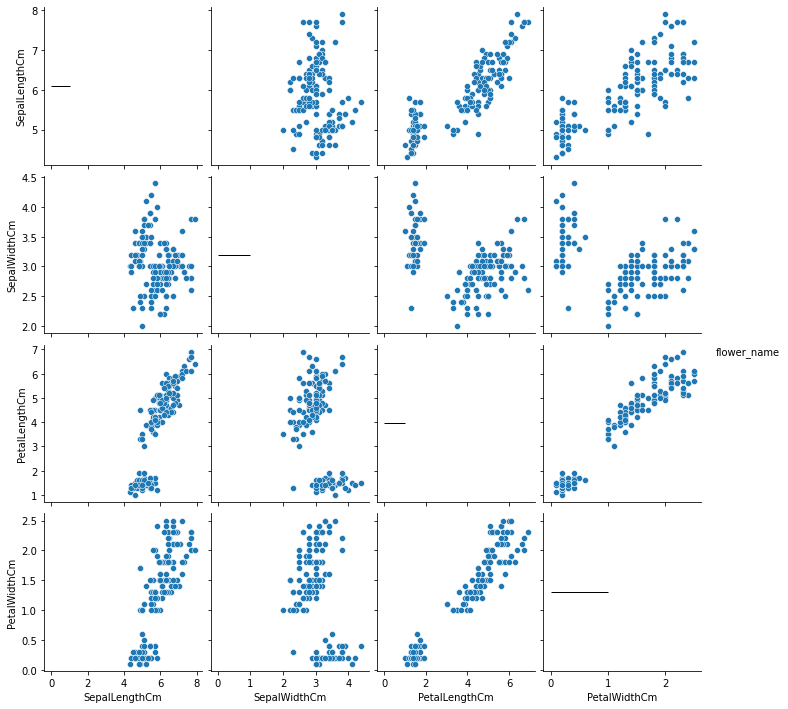

In [47]:
# The relationships between each pair of variables in the iris dataset
# Map integer labels to flower names
df_copy['flower_name'] = df_copy['Species'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

# Plot scatterplot matrix with flower names
sns.pairplot(df_copy, hue='flower_name', diag_kind='hist')

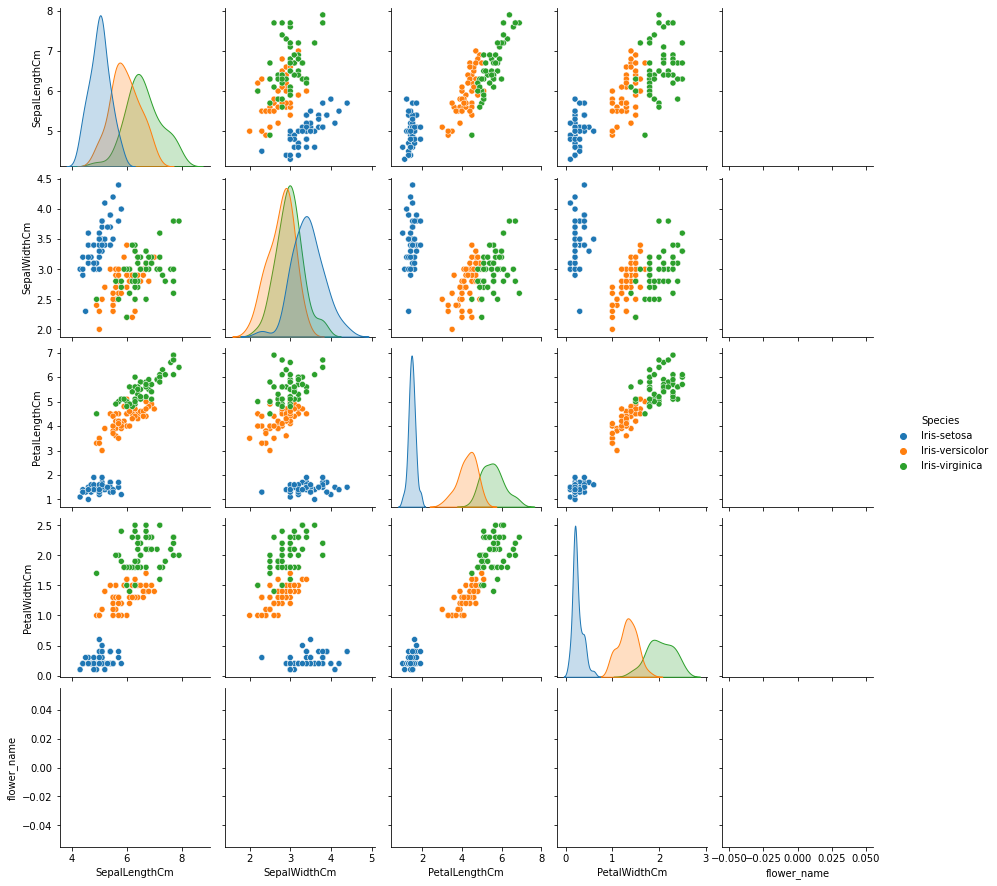

In [48]:
sns.pairplot(data=df_copy,hue='Species')
#plt.show()

<AxesSubplot:>

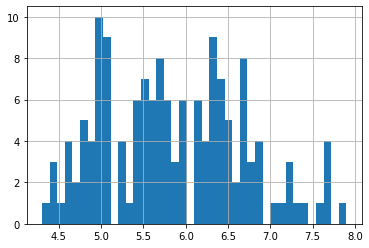

In [49]:
# Unique value in 'SepalLengthCm'
df_copy['SepalLengthCm'].hist(bins=40)

<AxesSubplot:>

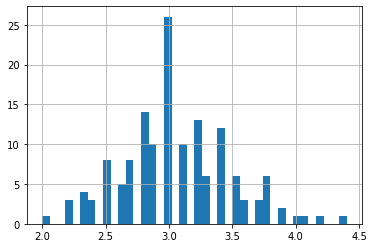

In [50]:
# Unique value in 'SepalWidthCm'
df_copy['SepalWidthCm'].hist(bins=40)

<AxesSubplot:>

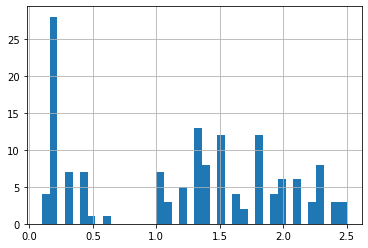

In [51]:
# Unique value in 'PetalWidthCm' and 'PetalLengthCm'
df_copy['PetalWidthCm'].hist(bins=40)


<AxesSubplot:>

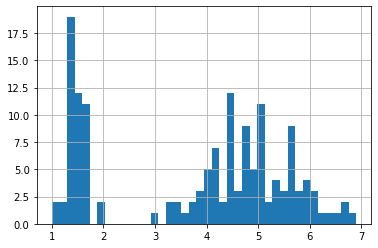

In [52]:
# Unique value in 'PetalLengthCm'
df_copy['PetalLengthCm'].hist(bins=40)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

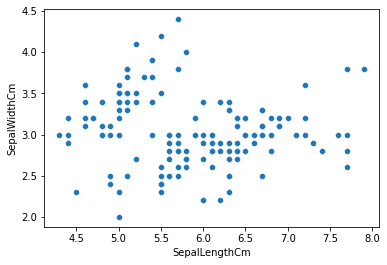

In [64]:
# A scatter plot of Sepal Length versus Sepal Width
sns.scatterplot(x=df_copy.SepalLengthCm,y=df_copy.SepalWidthCm,markers=False)

In [85]:
X= df_copy.iloc[:, [0,1,2,3]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

#### Finding Optimum Number of Clustring Using Elbow Method


In [91]:
data= df_copy.iloc[:, :-1].values

sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=300).fit(data)

    sse[i] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()))
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

ValueError: could not convert string to float: 'Iris-setosa'

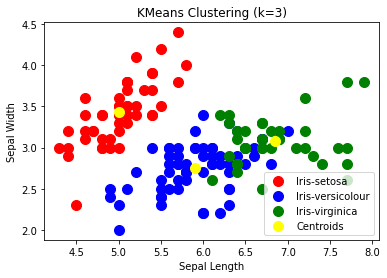

In [90]:
# Apply KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clustering result
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clustering (k=3)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()